In [18]:
# importacion general de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [19]:
df = pd.read_csv('dataTP1.csv')
df.head()

,ID,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,...,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A,Hemisferio,Estación
0,27761,Europa,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,...,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None,None,NaN
1,27760,Europa,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,...,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None,None,NaN
2,27446,América,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,...,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None,Hemisferio Norte,Otoño
3,16808,América,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None,Hemisferio Norte,Otoño
4,16805,América,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,...,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None,Hemisferio Norte,Otoño


In [20]:
df.count()

ID                                    16499
Region                                16499
Territory                             16499
Pricing, Delivery_Terms_Quote_Appr    16499
Pricing, Delivery_Terms_Approved      16499
Bureaucratic_Code_0_Approval          16499
Bureaucratic_Code_0_Approved          16499
Submitted_for_Approval                16499
Bureaucratic_Code                     16499
Account_Created_Date                  16499
Source                                16499
Billing_Country                       16499
Account_Name                          16499
Opportunity_Name                      16499
Opportunity_ID                        16499
Sales_Contract_No                     16499
Account_Owner                         16499
Opportunity_Owner                     16499
Account_Type                          16499
Opportunity_Type                      16499
Quote_Type                            16499
Delivery_Terms                        16499
Opportunity_Created_Date        

In [5]:
entrenamiento_sin_id = df.drop(['ID'], axis=1)
sin_duplicados = entrenamiento_sin_id.drop_duplicates(keep=False) 
sin_duplicados.count()

Region                                16499
Territory                             16499
Pricing, Delivery_Terms_Quote_Appr    16499
Pricing, Delivery_Terms_Approved      16499
Bureaucratic_Code_0_Approval          16499
Bureaucratic_Code_0_Approved          16499
Submitted_for_Approval                16499
Bureaucratic_Code                     16499
Account_Created_Date                  16499
Source                                16499
Billing_Country                       16499
Account_Name                          16499
Opportunity_Name                      16499
Opportunity_ID                        16499
Sales_Contract_No                     16499
Account_Owner                         16499
Opportunity_Owner                     16499
Account_Type                          16499
Opportunity_Type                      16499
Quote_Type                            16499
Delivery_Terms                        16499
Opportunity_Created_Date              16499
Brand                           

In [16]:
sin_duplicados.head()

,Region,Territory,"Pricing, Delivery_Terms_Quote_Appr","Pricing, Delivery_Terms_Approved",Bureaucratic_Code_0_Approval,Bureaucratic_Code_0_Approved,Submitted_for_Approval,Bureaucratic_Code,Account_Created_Date,Source,...,Delivery_Quarter,Delivery_Year,Actual_Delivery_Date,TRF,Total_Amount_Currency,Total_Amount,Total_Taxable_Amount_Currency,Total_Taxable_Amount,Stage,Prod_Category_A
0,EMEA,None,1,1,1,1,0,Bureaucratic_Code_4,6/16/2015,None,...,Q2,2016,NaT,10,EUR,5272800.0,EUR,5272800.0,Closed Lost,Prod_Category_A_None
1,EMEA,None,0,0,0,0,0,Bureaucratic_Code_4,6/16/2015,None,...,Q1,2016,NaT,0,EUR,48230.0,EUR,48230.0,Closed Won,Prod_Category_A_None
2,Americas,NW America,0,0,0,0,0,Bureaucratic_Code_4,4/21/2015,Source_7,...,Q1,2016,NaT,0,USD,83865.6,USD,83865.6,Closed Won,Prod_Category_A_None
3,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,14,USD,7421881.5,USD,7421881.5,Closed Lost,Prod_Category_A_None
4,Americas,NW America,1,0,1,0,0,Bureaucratic_Code_5,7/27/2013,Source_11,...,Q1,2018,NaT,25,USD,13357192.5,USD,13357192.5,Closed Lost,Prod_Category_A_None


In [21]:
#Investigamos que contenido hay en cada una de las columnas burocraticas
df['Bureaucratic_Code'].value_counts()

Bureaucratic_Code_4    12211
Bureaucratic_Code_5     3769
Bureaucratic_Code_1      233
Bureaucratic_Code_2      233
Bureaucratic_Code_0       50
Bureaucratic_Code_3        2
Bureaucratic_Code_6        1
Name: Bureaucratic_Code, dtype: int64

In [22]:
df['Submitted_for_Approval'].value_counts()

0    16499
Name: Submitted_for_Approval, dtype: int64

In [23]:
#La columna 'Submitted_for_Approval' tiene contenido "basura" ya que no nos aporta nada. Son datos "corrompidos".

In [24]:
df['Bureaucratic_Code_0_Approval'].value_counts()

0    8691
1    7808
Name: Bureaucratic_Code_0_Approval, dtype: int64

In [25]:
df['Pricing, Delivery_Terms_Approved'].value_counts()

1    9655
0    6844
Name: Pricing, Delivery_Terms_Approved, dtype: int64

In [26]:
df['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    13424
0     3075
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

In [32]:
approved = df.loc[(df['Bureaucratic_Code_0_Approval']==1)\
                              & (df['Pricing, Delivery_Terms_Approved']==1)\
                              & (df['Pricing, Delivery_Terms_Quote_Appr']==1),:]
approved['Stage'].value_counts()

Closed Won     2839
Closed Lost    2512
Proposal         26
Negotiation      17
Name: Stage, dtype: int64

In [33]:
approved = approved.loc[(approved['Stage']!='Proposal') & (approved['Stage']!='Negotiation') & (approved['Stage']!='Qualification'),:]

In [34]:
df['Stage'].value_counts()

Closed Won       9300
Closed Lost      7135
Proposal           35
Negotiation        18
Qualification      11
Name: Stage, dtype: int64

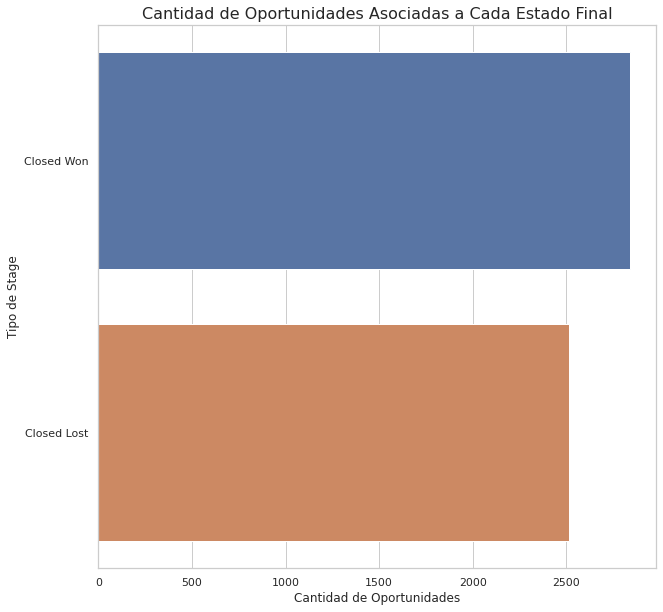

In [35]:
target = approved['Stage'].value_counts()
plt.subplots(figsize=(10,10))
grafico_top_key=sns.barplot(x=target.values,y=target.index)
grafico_top_key.set_title("Cantidad de Oportunidades Asociadas a Cada Estado Final",fontsize=16)
grafico_top_key.set_xlabel("Cantidad de Oportunidades",fontsize=12)
grafico_top_key.set_ylabel("Tipo de Stage",fontsize=12);

De las 9300 oportunidades que fueron exitosas, unicamente 2839 tienen aprovado el codigo burocrático 0 y acordados los terminos de precio y envio.

In [37]:
approved_bureaucratic_0_and_won = df.loc[(df['Bureaucratic_Code_0_Approval']==1) & (df['Stage']=='Closed Won'),:]
approved_bureaucratic_0_and_won['Stage'].count()

3507

Solamente tomando la petición de aprobación del codigo 0 burocratico, se suman unos 668oportunidades nuevas que fueron concretadas.

In [64]:
approved_bureaucratic_0_and_won['Bureaucratic_Code_0_Approved'].value_counts()

1    2730
0     736
Name: Bureaucratic_Code_0_Approved, dtype: int64

De las 3507oportunidades que pidieron la aprobación, solamente 2730 pero finalmente todas terminaron en una operación exitosa.

In [38]:
approved_terms_and_won = df.loc[(df['Pricing, Delivery_Terms_Approved']==1) & (df['Stage']=='Closed Won'),:]
approved_terms_and_won['Region'].count()

6312

Solamente tomando la aprobación de terminos de envio y precio, se suman unos 3473 oportunidades nuevas que fueron concretadas.

In [39]:
approved_terms_and_won['Pricing, Delivery_Terms_Quote_Appr'].value_counts()

1    6312
Name: Pricing, Delivery_Terms_Quote_Appr, dtype: int64

De las 6312 oportunidades que fueron aprobadas, y terminaron en exito, todas fueron previamente acordadas. Veamos que sucede en la situación inversa.

In [40]:
approved_quote_terms_and_won = df.loc[(df['Pricing, Delivery_Terms_Quote_Appr']==1) & (df['Stage']=='Closed Won'),:]
approved_quote_terms_and_won['Stage'].count()

7301

In [41]:
approved_quote_terms_and_won['Pricing, Delivery_Terms_Approved'].value_counts()

1    6312
0     989
Name: Pricing, Delivery_Terms_Approved, dtype: int64

Se acordaron 7301 terminos, de los cuales terminaron en exito, como se muestra previamente, 6312. De todas formas, de las 989 oportunidades que no se "acordaron" los terminos, finalizaron en un acuerdo exitoso.